# VISUALIZING GEOSPATIAL DATA IN R

***

# Contents
* [Read Geospatial Data](#Read-Geospatial-Data)
* [Mapping and Projection Functions](#Mapping-and-Projection-Functions)

***

## Read Geospatial Data
[`Back to Contents`](#Contents)

- **Configurations**

In [5]:
# install.packages("rgdal")
# install.packages("maps")
# install.packages("mapproj")

# library(rgdal)
# library(maps)
# library(mapproj)

file_dir = getwd()
data_dir = paste(file_dir, '/data/', sep = "")

setwd(file_dir)
# getwd()

- **Write and Read Shapefiles**

In [17]:
setwd(data_dir)

# shapefile
sids.poly = readOGR('.', 'sids') # the Sudden Infant Death Syndrome (SIDS) data
sids.df = as.data.frame(sids.poly)
head(sids.df)

# writeOGR(sids.poly, '.', 'my_sids', driver='ESRI Shapefile')

setwd(file_dir)

OGR data source with driver: ESRI Shapefile 
Source: "D:\Repos\SP19_GEOG8102_AdvancedSpatailAnalysis\hw1\data", layer: "sids"
with 100 features
It has 14 fields
Integer64 fields read as strings:  CNTY_ CNTY_ID FIPSNO 


,AREA,PERIMETER,CNTY_,CNTY_ID,NAME,FIPS,FIPSNO,CRESS_ID,BIR74,SID74,NWBIR74,BIR79,SID79,NWBIR79
0,0.114,1.442,1825,1825,Ashe,37009,37009,5,1091,1,10,1364,0,19
1,0.061,1.231,1827,1827,Alleghany,37005,37005,3,487,0,10,542,3,12
2,0.143,1.630,1828,1828,Surry,37171,37171,86,3188,5,208,3616,6,260
3,0.070,2.968,1831,1831,Currituck,37053,37053,27,508,1,123,830,2,145
4,0.153,2.206,1832,1832,Northampton,37131,37131,66,1421,9,1066,1606,3,1197
5,0.097,1.670,1833,1833,Hertford,37091,37091,46,1452,7,954,1838,5,1237


list all created variables

- **Creating a plot**

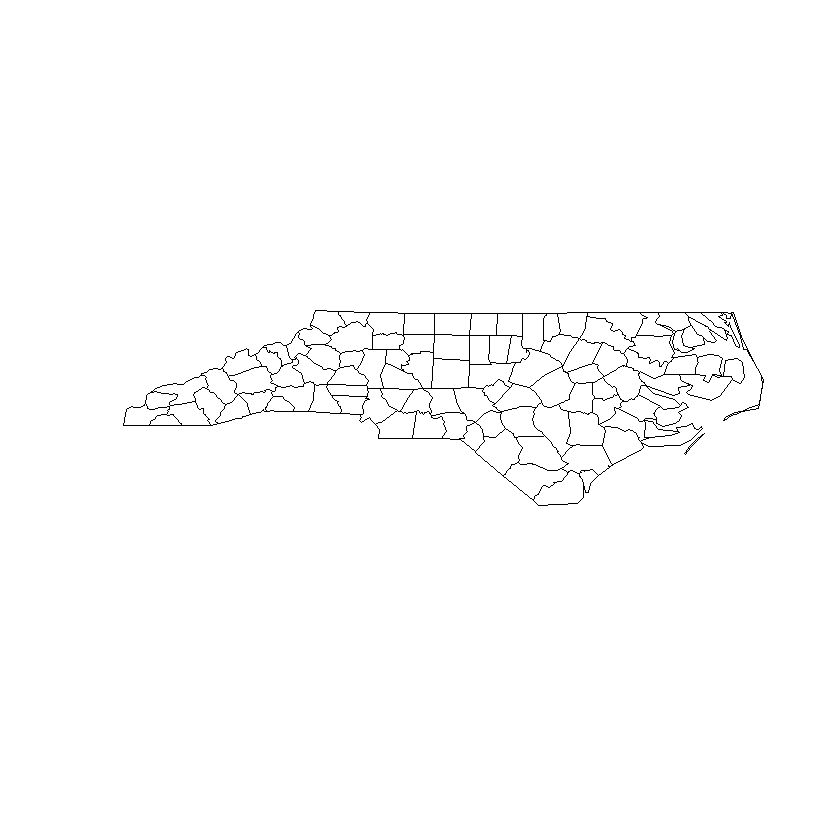

In [18]:
# plot map
plot(sids.poly)

- **Thematic/Choropleth maps**

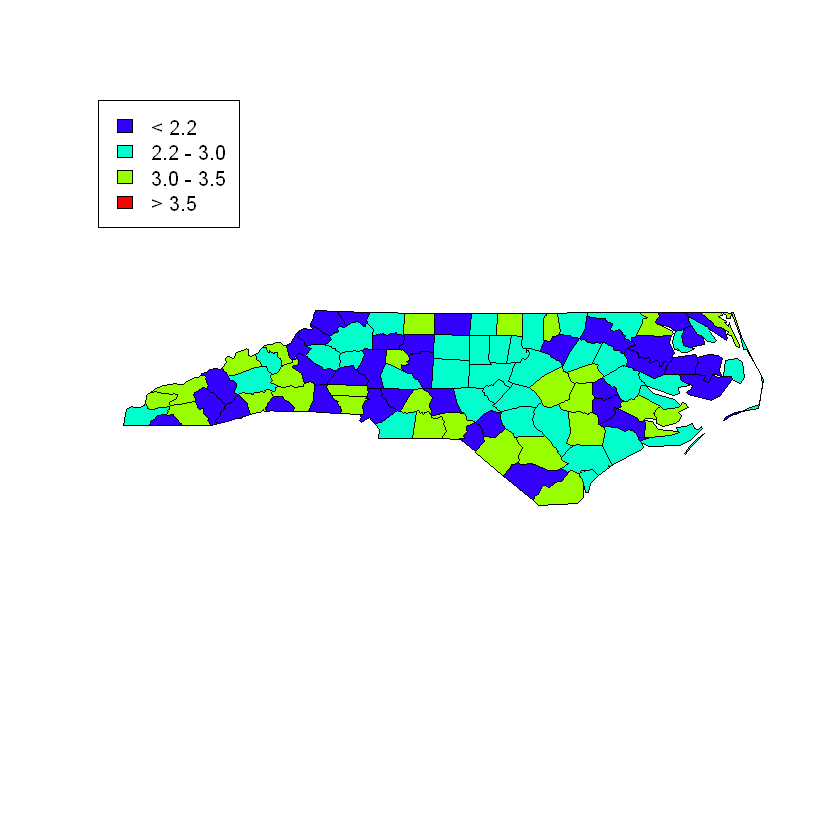

In [19]:
# Freeman00Turkey square-root transformation to represent birth v.s. death rates
sids.y = sqrt(1000)*(sqrt(sids.df$SID79/sids.df$BIR79)+
                        sqrt((sids.df$SID79+1)/sids.df$BIR79))

# aggregate ranges
sids.ygrep = rep(1, length(sids.y))
sids.ygrep[(sids.y >= 2.2 & sids.y < 3.0)] = 2
sids.ygrep[(sids.y >= 3.0 & sids.y < 3.5)] = 3
sids.ygrep[(sids.y >= 23.5)] = 4

# plot a rainbow-color map
rainbow4 = rainbow(4, start=0, end=0.7)
clr = rev(rainbow4)[sids.ygrep]
plot(sids.poly, col=clr)
legend("topleft", legend=c('< 2.2', '2.2 - 3.0', '3.0 - 3.5', '> 3.5'), 
       fill=rev(rainbow4))

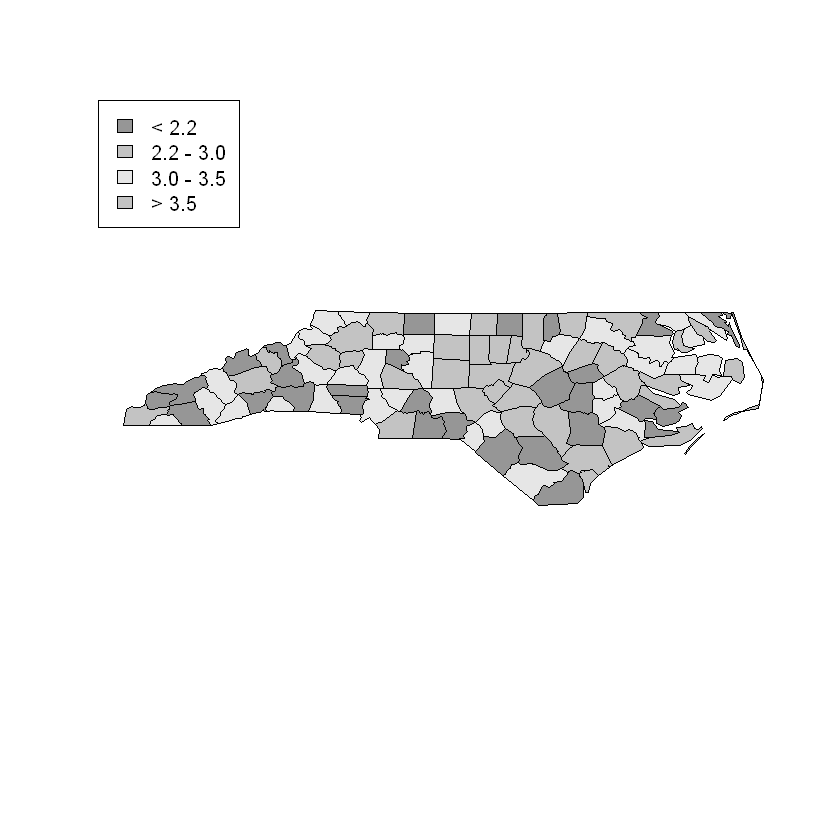

In [20]:
# alternative to create an efficient gray map
clrg = rev(gray.colors(4))[sids.ygrep]
plot(sids.poly, col=clrg)
legend('topleft', legend=c('< 2.2', '2.2 - 3.0', '3.0 - 3.5', '> 3.5'), 
        fill=rev(clrg))

## Mapping and Projection Functions
[`Back to Contents`](#Contents)

- **Mapping in R**

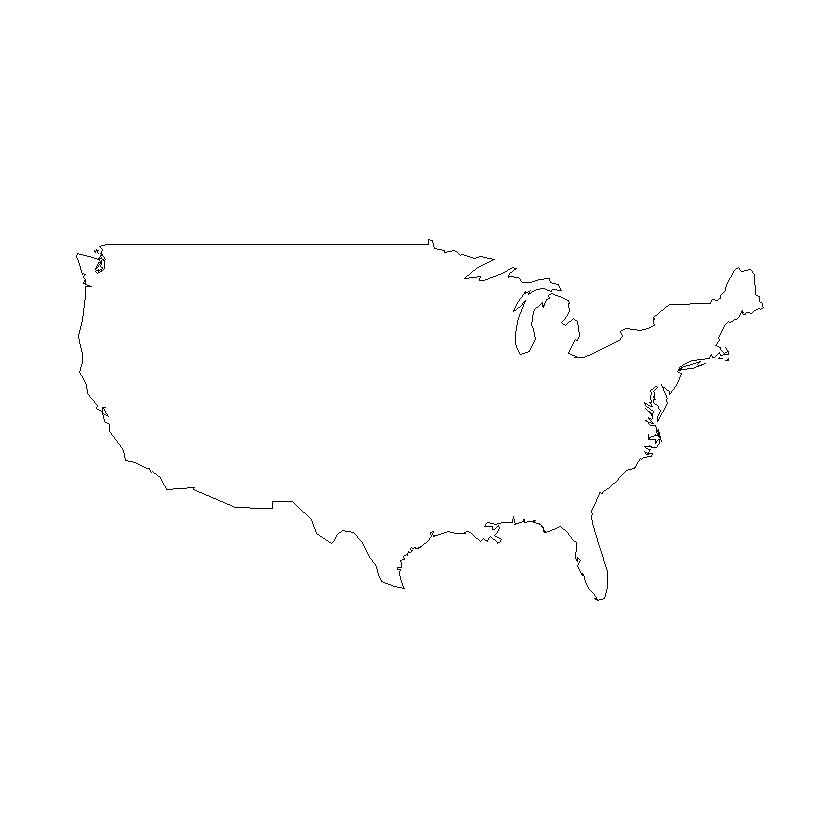

In [29]:
map('usa')

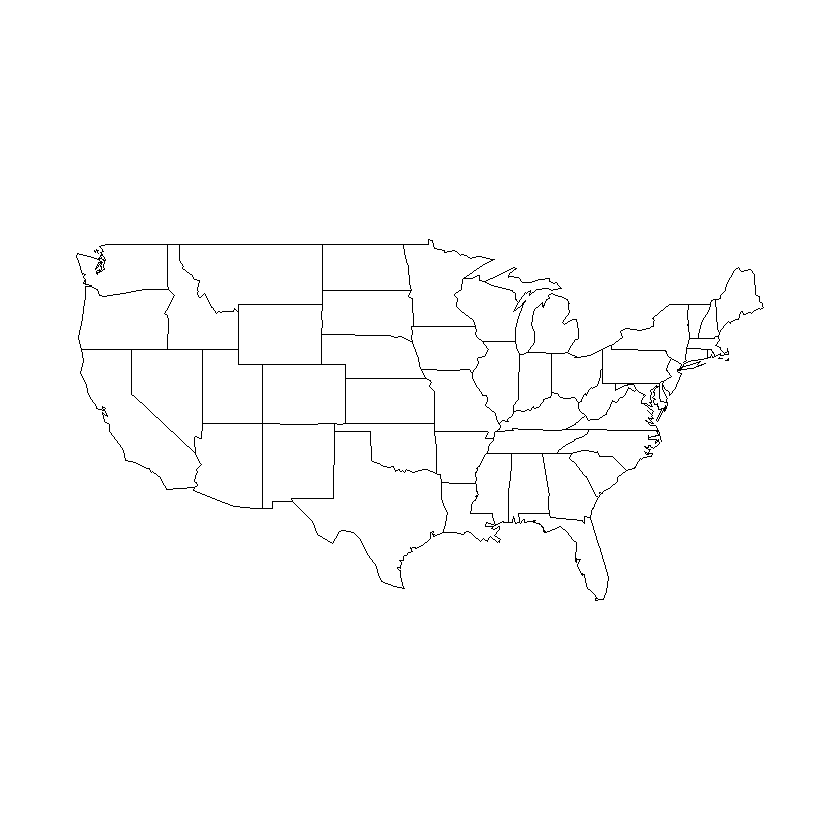

In [30]:
map('state')

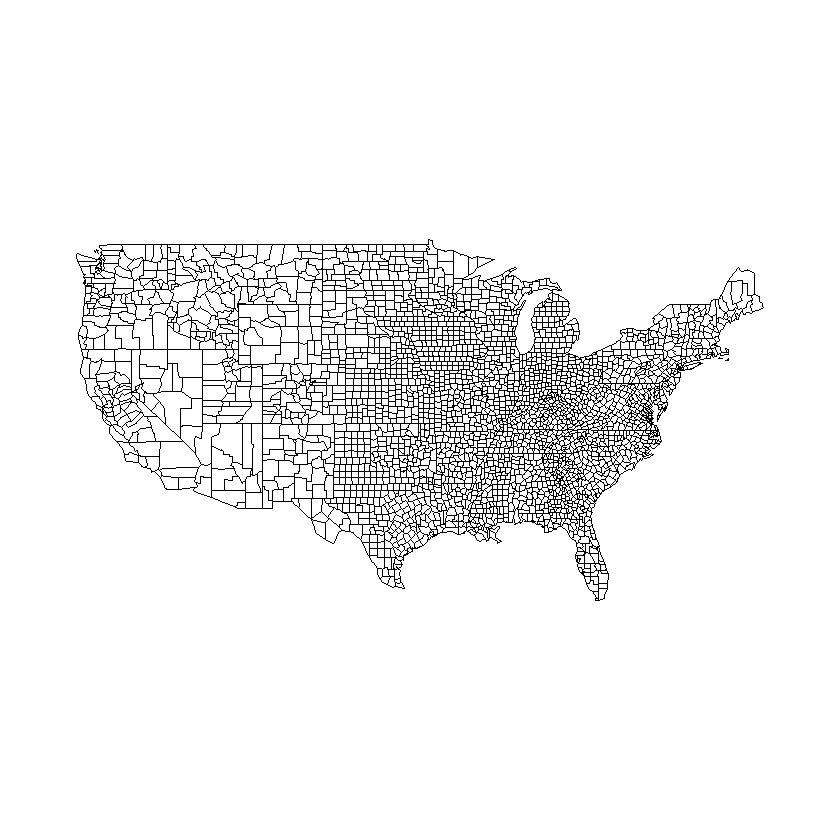

In [31]:
map('county')

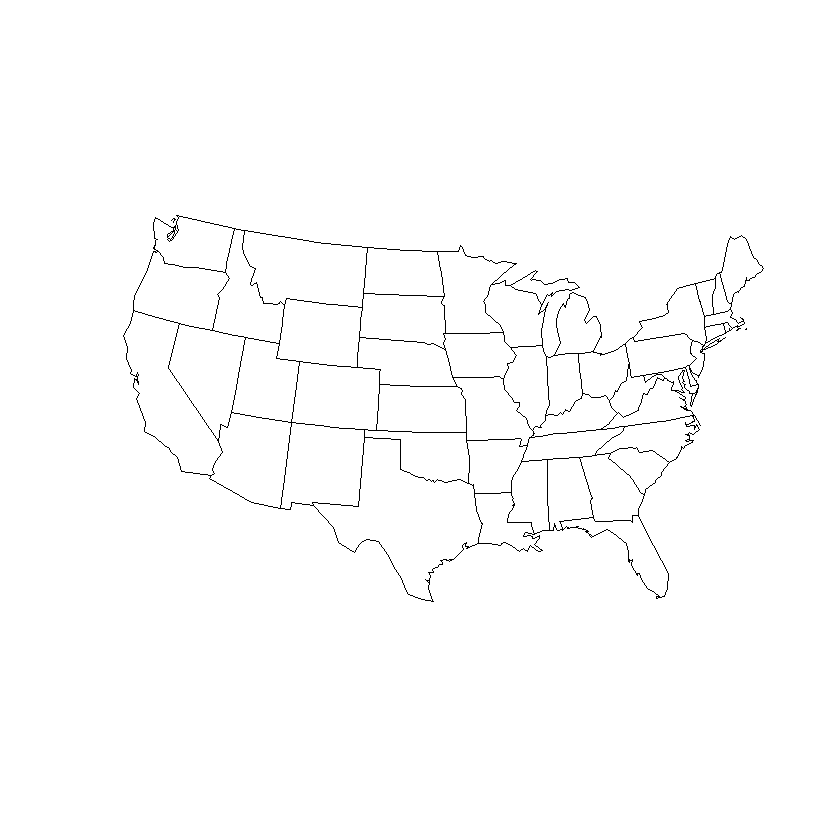

In [37]:
map('state', proj='albers', param=c(30,40))

- **Fosuing on specific regions**

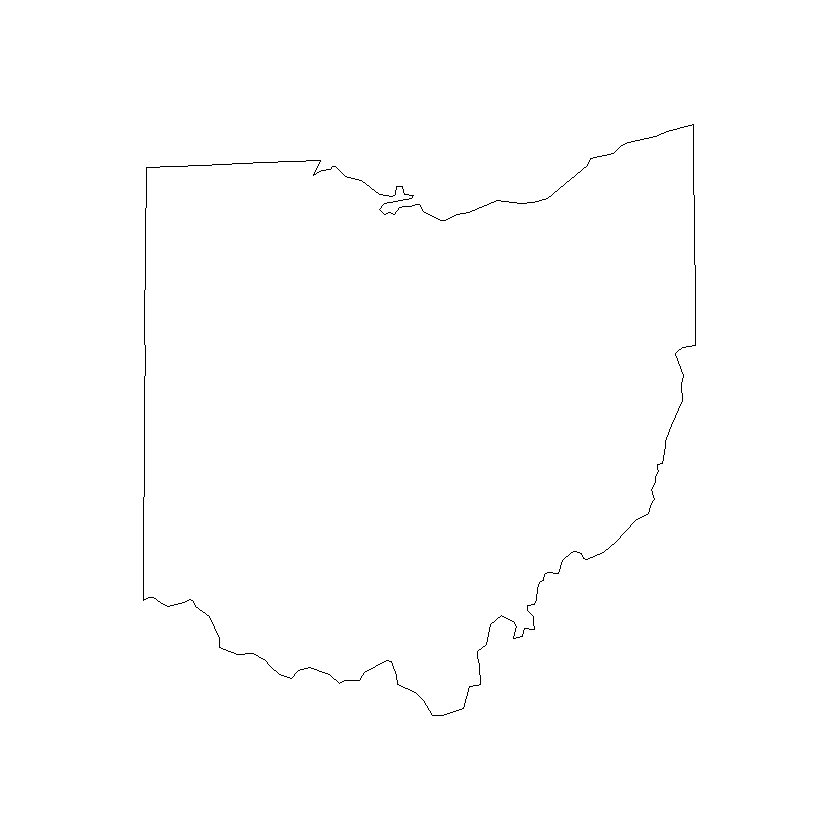

In [38]:
map('state', 'ohio')

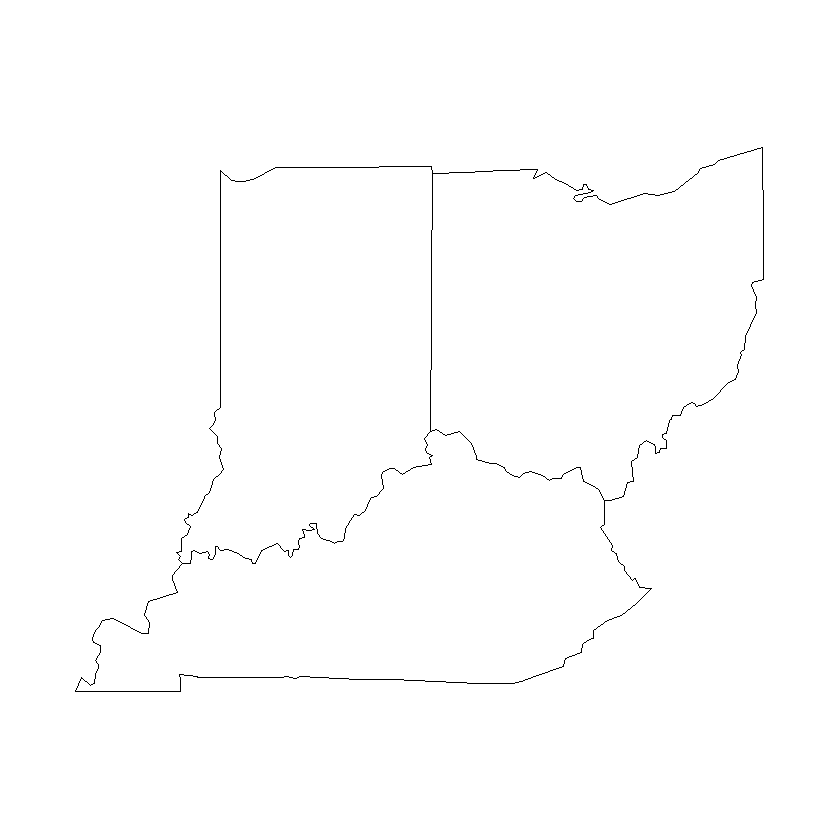

In [39]:
map('state', c('ohio', 'indiana', 'kentucky'))

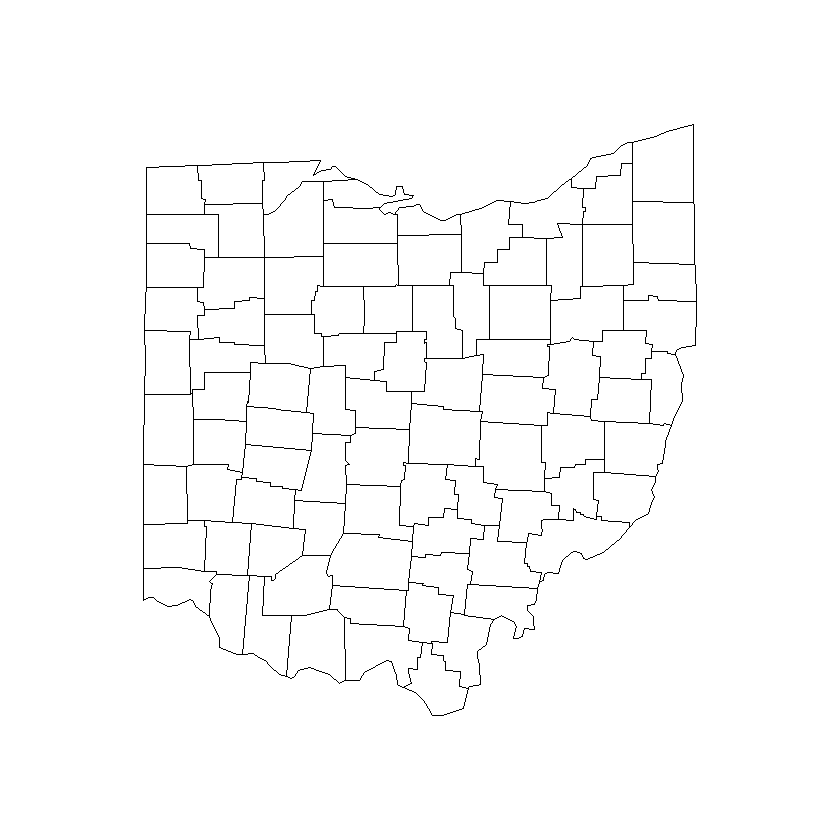

In [40]:
map('county', 'ohio')

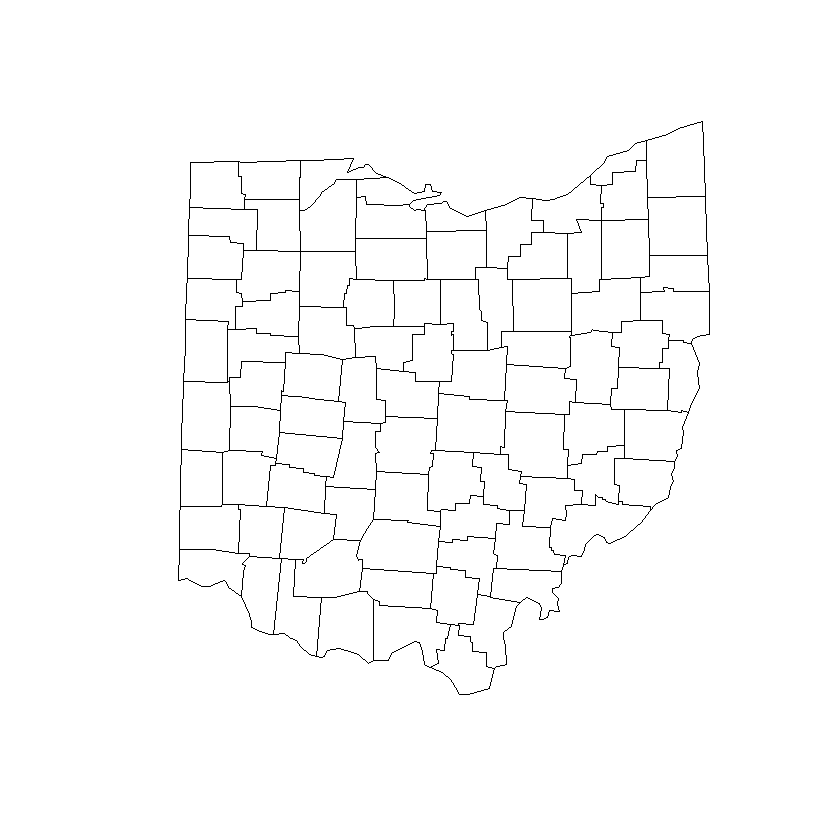

In [80]:
map('county', proj='albers', param=c(37,41), 'ohio')

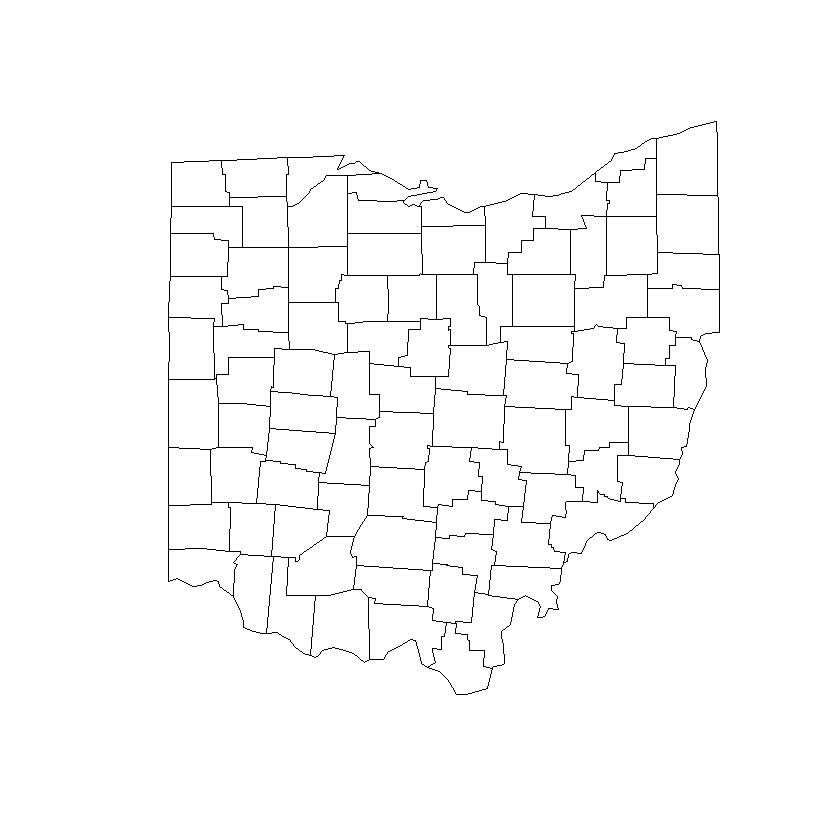

In [44]:
map('county', proj='cylequalarea', param=c(39), 'ohio')

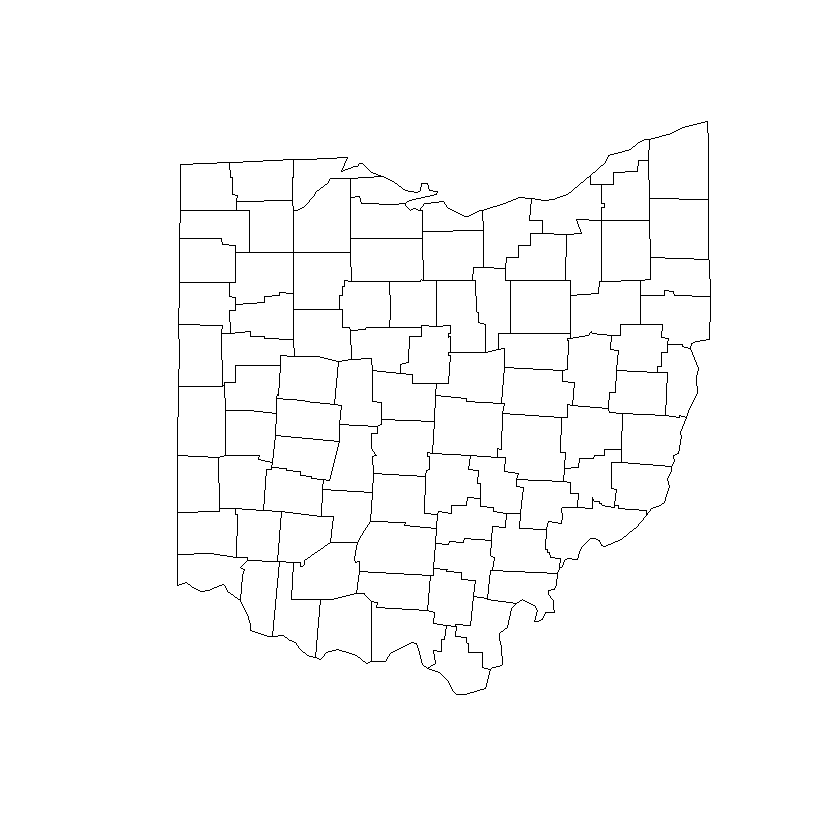

In [46]:
map('county', proj='mercator', 'ohio')

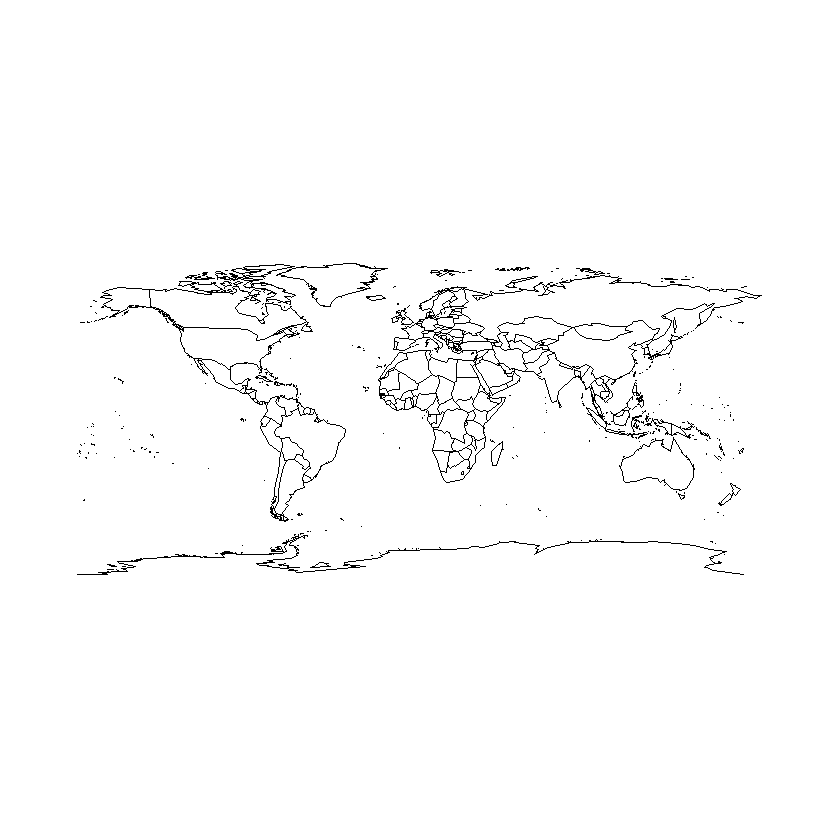

In [47]:
map('world')

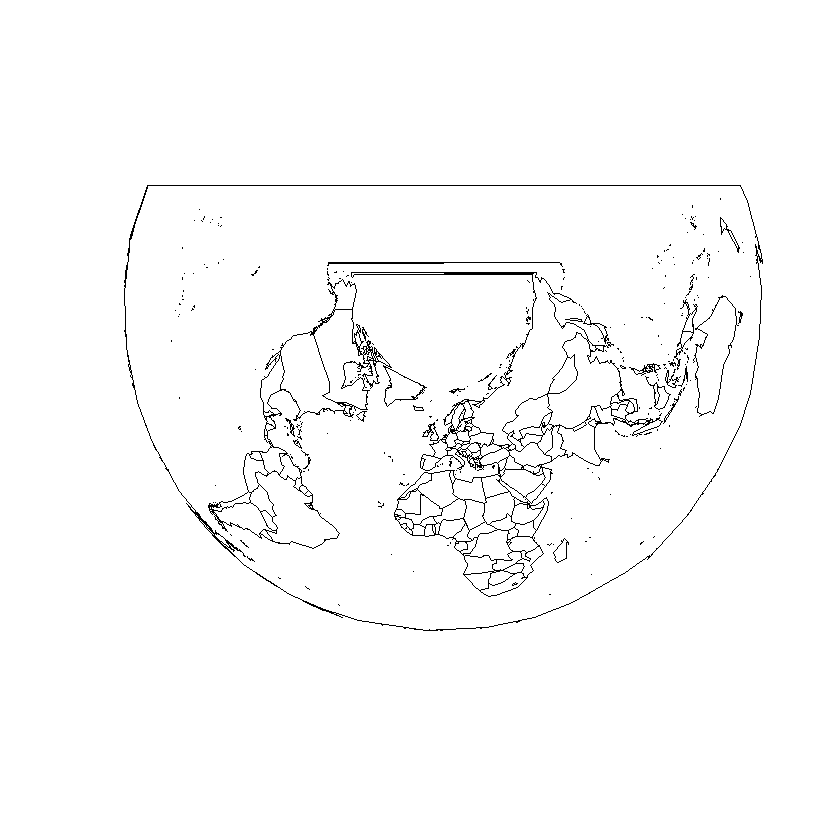

In [48]:
map('world', proj='albers', param=c(37,41))

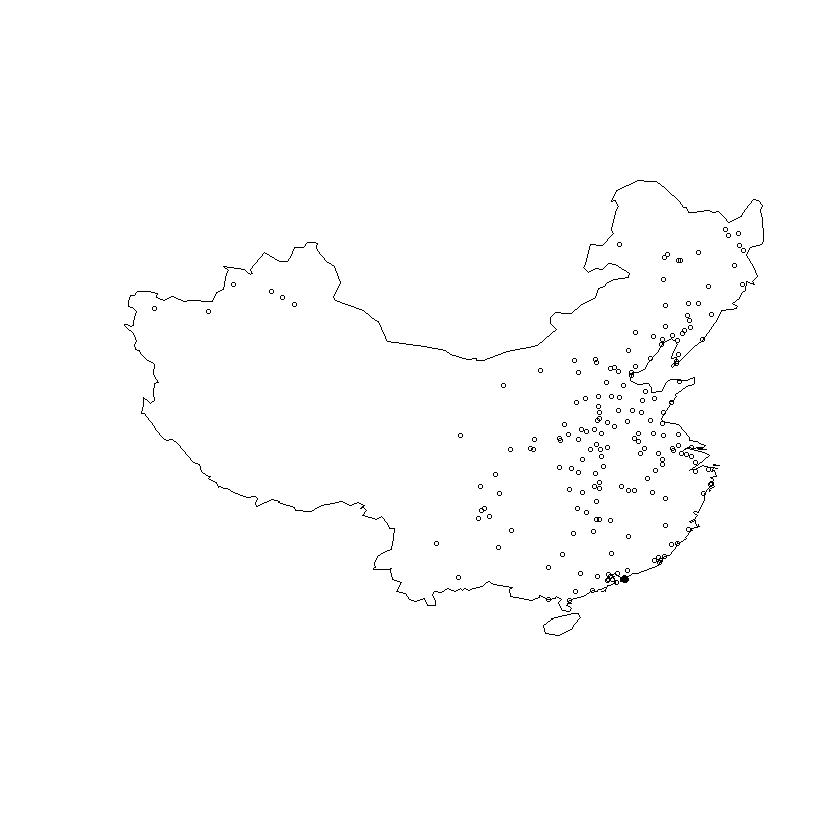

In [50]:
map('world', 'china', proj='azequalarea')
map.cities(country='China', projection=TRUE, minpop=200000)

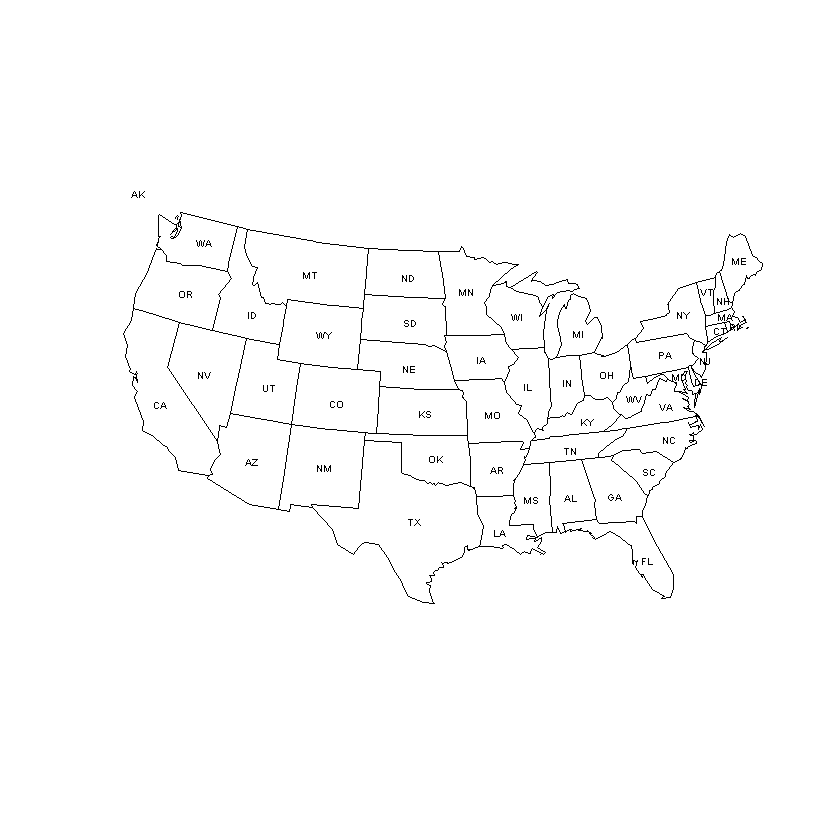

In [51]:
map('state', proj='albers', param=c(37,41))
text(mapproject(state.center), state.abb, cex=0.5)  # cex - the size of the text